# 13. 이미지 변형 (이진화)

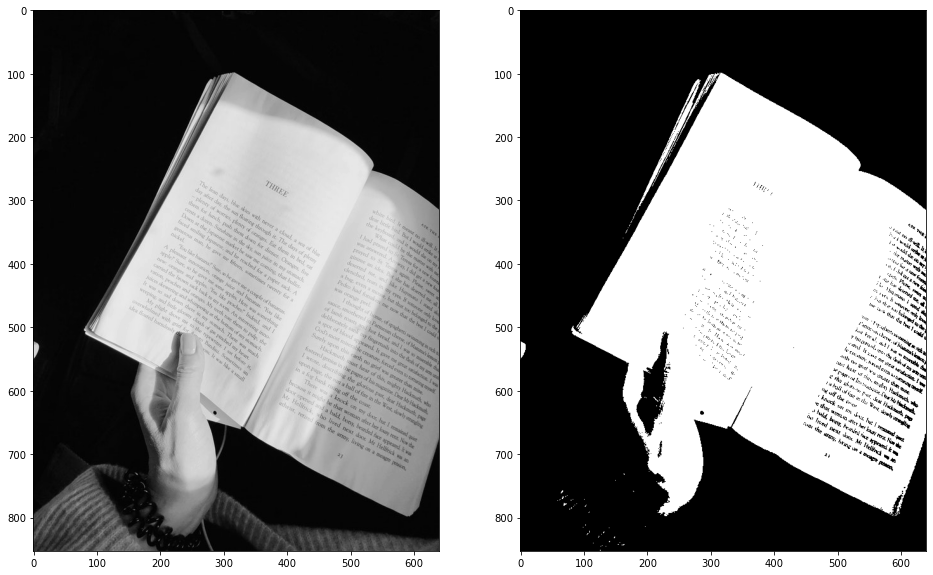

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)

ret, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(binary, 'gray')

## Trackbar (값 변화에 따른 변형 확인)

In [11]:
import cv2

def empty(pos):
#     print(pos)
    pass

img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)

name = 'Trackbar'
cv2.namedWindow(name)

cv2.createTrackbar('threshold', name, 127, 255, empty) # bar 이름, bar가 들어갈 window 이름, 초기값, 최대값, 값 변경 시 event

while True:
    thresh = cv2.getTrackbarPos('threshold', name) # bar 이름, window 이름
    ret, binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
    
    if not ret:
        break
    
    cv2.imshow(name, binary)
    if cv2.waitKey(1) == ord('q'):
        break
        
cv2.destroyAllWindows()

## Adaptive Threshold

이미지를 작은 영역으로 나누어서 임계치 적용

In [2]:
import cv2

def empty(pos):
#     print(pos)
    pass

img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)

name = 'Trackbar'
cv2.namedWindow(name)

# bar 이름, bar가 들어갈 window 이름, 초기값, 최대값, 값 변경 시 event
cv2.createTrackbar('block_size', name, 25, 100, empty) # 홀수만 가능, 1보다는 큰 값
cv2.createTrackbar('c', name, 3, 10, empty) # 일반적으로 양수의 값을 사용

while True:
    block_size = cv2.getTrackbarPos('block_size', name) # bar 이름, window 이름
    c = cv2.getTrackbarPos('c', name)
    
    if block_size <= 1: # 1 이하면 3 으로 변경
        block_size = 3
        
    if block_size % 2 == 0: # 짝수이면 홀수로
        block_size += 1
    
    binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c)
    
    
    cv2.imshow(name, binary)
    if cv2.waitKey(1) == ord('q'):
        break
        
cv2.destroyAllWindows()

## 오츠 알고리즘

Bimodal Image 에 사용하기 적합 (최적의 임계치를 자동으로 발견)

In [6]:
import cv2

img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)

ret, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

print('otsu threshold: {}'.format(ret))

cv2.imshow('img', img)
cv2.imshow('binary', binary)
cv2.imshow('otsu', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

otsu threshold: 100.0
